## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# files to DF
mouse_df = pd.read_csv(mouse_metadata)
study_df = pd.read_csv(study_results)

#combine data frames
full_df = pd.merge(mouse_df, study_df, on = "Mouse ID", how = "outer")
full_df.head()

#sort
full_df.sort_values("Timepoint")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1529,s619,Stelasyn,Male,22,30,0,45.000000,0
558,a818,Naftisol,Female,12,28,0,45.000000,0
1531,t198,Propriva,Male,22,26,0,45.000000,0
551,a788,Zoniferol,Male,5,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
174,a644,Ramicane,Female,7,17,45,32.978522,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
689,c559,Zoniferol,Female,19,28,45,61.840058,4
706,c757,Placebo,Male,9,27,45,69.042841,3


In [34]:
# Checking the number of mice.
full_df['Mouse ID'].nunique()

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_dup = full_df[full_df.duplicated(subset=['Mouse ID','Timepoint'])]
print(find_dup)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
full_df.loc[full_df['Mouse ID']=='g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_df = full_df[full_df['Mouse ID'] != 'g989']
full_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice in the clean DataFrame.
full_df['Mouse ID'].nunique()

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
full_df_sorted = full_df.sort_values(['Tumor Volume (mm3)'], ascending = True)
full_df_sorted.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [43]:
#Stats by drug grouped
drug_grouped = full_df_sorted.groupby(["Drug Regimen"])
drug_grouped

#create a variable to capture the total tumor volume for each regimen
#tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
drug_mean = drug_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
drug_median = drug_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
drug_variance = drug_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
drug_std = drug_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
drug_sem = drug_grouped["Tumor Volume (mm3)"].sem()




# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance":drug_variance, "Standard Deviation": drug_std, "SEM": drug_sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Use count to make datapoints
drug_datapoints = full_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
drug_datapoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

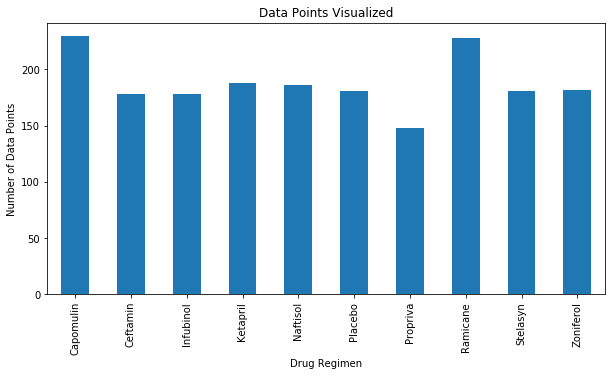

<Figure size 432x288 with 0 Axes>

In [65]:
# generate bar plot using pyplot
drug_datapoints.plot(kind="bar", figsize=(10,5))

#set chart labels
plt.title("Data Points Visualized")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

bar_df = full_df.sort_values('Drug Regimen')


#show chart
plt.show()
plt.tight_layout()

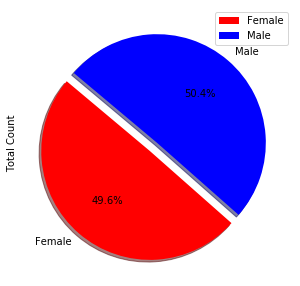

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['red', 'blue']
explode = (0.1,0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimens = full_df[full_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimens = best_regimens.sort_values(["Timepoint"], ascending=True)
best_regimens

best_regimens_df = best_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimens_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


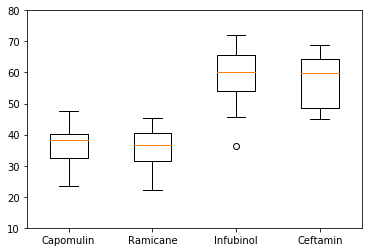

In [70]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_regimens_sort = best_regimens_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimens_sort_df = best_regimens_sort.to_frame()
best_regimens_sort_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimens_sort_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()
    

[45.0, 45.83899787, 46.42536551, 47.32298428, 48.15820939, 42.41716589, 43.01368114, 43.76570537, 44.5850896, 38.125164399999996]
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


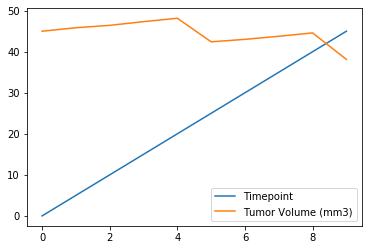

In [72]:

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumor = full_df[full_df["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()


## Line and Scatter Plots

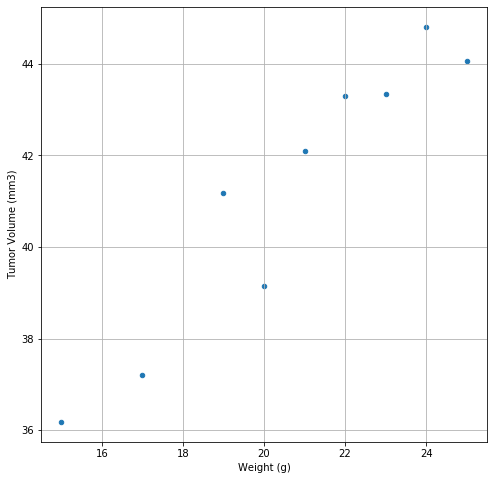

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = full_df[full_df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_df.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = capomulin_grouped_weight.reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


## Correlation and Regression

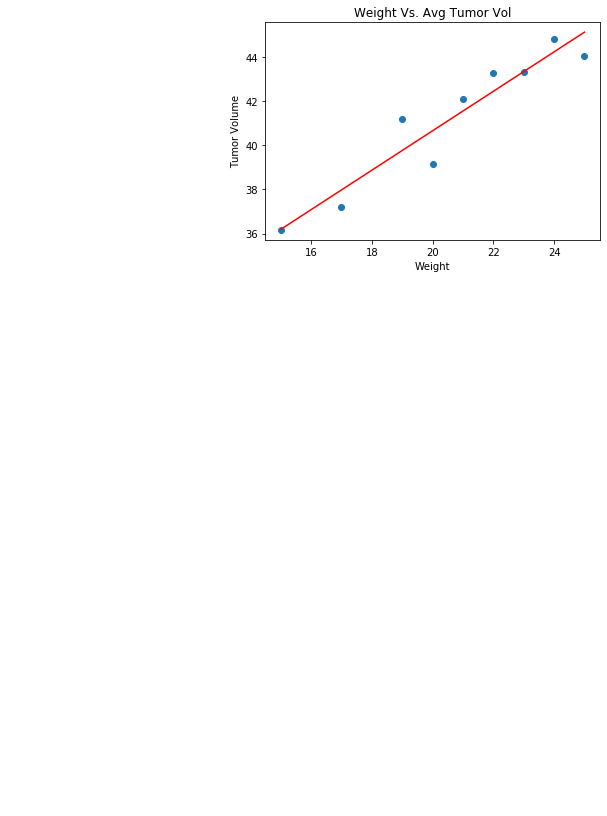

In [75]:
# Calculate the correlation coefficient and linear regression model 
x_values = capo_grouped_plot["Weight (g)"]
y_values = capo_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()


# for mouse weight and average tumor volume for the Capomulin regimen
